### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

Parametro di forma stimato dal campione: 0.9514
Varianza teorica della distribuzione gamma (forma=1): 1.0000


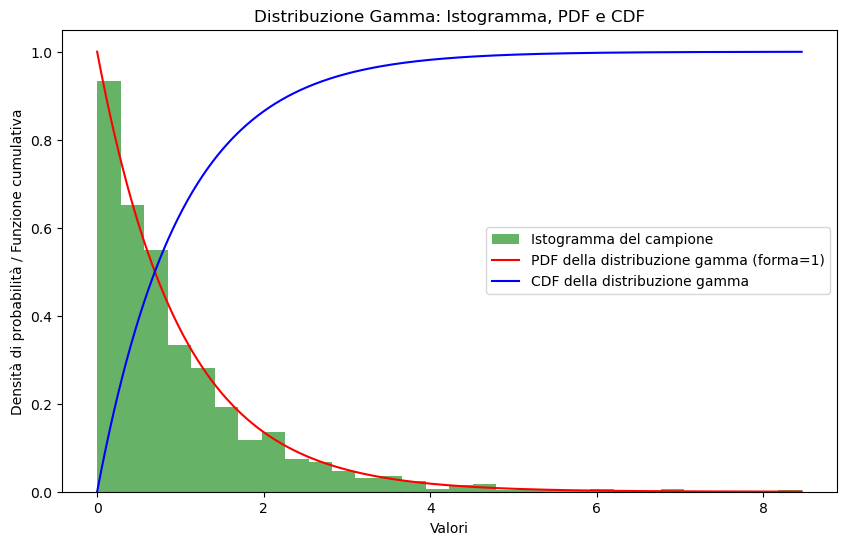

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Genera 1000 valori casuali da una distribuzione gamma con parametro di forma = 1
shape = 1 # stiamo generando numeri casuali da una distribuzione con un parametro di forma pari a 1.
sample = gamma.rvs(shape, size=1000)  #rvs genera numeri casuali da una distribuzione specifica (in questo caso una distribuzione Gamma).

# Traccia l'istogramma del campione
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', label='Istogramma del campione') #con bins  dividiamo l'asse orizzontale in 30 intervalli per raggruppare i dati
#density normalizza l'istogramma(area=1)
#alpha=trasparenza, colour=colore,label=etichetta

# Sovrapponi la PDF della distribuzione gamma
x = np.linspace(0, np.max(sample), 1000) #array di 1000 val tra 0 e il val max
pdf = gamma.pdf(x, shape) #calcolo la funzione di densità di probabilità della distribuzione Gamma per ogni valore di x
plt.plot(x, pdf, 'r-', label='PDF della distribuzione gamma (forma=1)') #traccio la funzione sul grafico

# Stima il parametro di forma dal campione usando il metodo fit
params = gamma.fit(sample, floc=0)  # 'floc=0' fissa la posizione del parametro di localizzazione a 0
estimated_shape = params[0] #Estraiamo il parametro di forma (shape) dal risultato restituito da fit() 

# Mostra la stima del parametro di forma
print(f"Parametro di forma stimato dal campione: {estimated_shape:.4f}")

# Traccia la CDF
cdf = gamma.cdf(x, shape)
plt.plot(x, cdf, 'b-', label='CDF della distribuzione gamma')

# Calcola la varianza
variance = gamma.var(shape)
print(f"Varianza teorica della distribuzione gamma (forma=1): {variance:.4f}")

# Mostra il grafico
plt.legend(loc='best')
plt.title('Distribuzione Gamma: Istogramma, PDF e CDF')
plt.xlabel('Valori')
plt.ylabel('Densità di probabilità / Funzione cumulativa')
plt.show()




### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

TEMP MAX - MAE: 2.57, RMSE: 2.90
TEMP MIN - MAE: 6.36, RMSE: 7.42


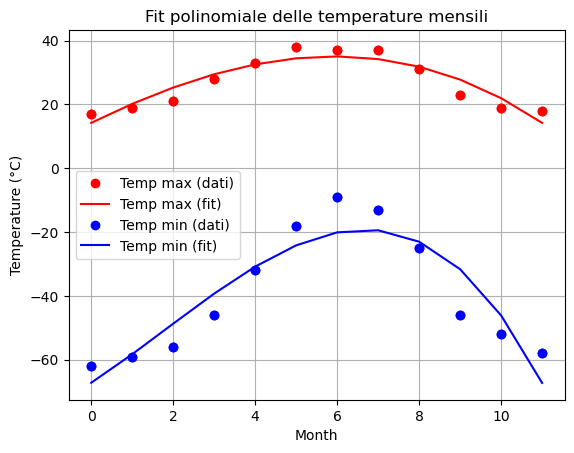

In [5]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")

#Osservando il grafico, possiamo già intuire che una curva polinomiale di grado 2 o 3 potrebbe adattarsi meglio dei semplici modelli lineari (soprattutto per le minime).
# Fit polinomiale di grado 3
coeffs_max = np.polyfit(months, temp_max, 3)
coeffs_min = np.polyfit(months, temp_min, 3)

# Funzioni polinomiali
poly_max = np.poly1d(coeffs_max)
poly_min = np.poly1d(coeffs_min)

# Valori stimati
temp_max_pred = poly_max(months)
temp_min_pred = poly_min(months)

import math

# Errori temperatura massima
mae_max = np.mean(np.abs(temp_max - temp_max_pred))
rmse_max = math.sqrt(np.mean((temp_max - temp_max_pred)**2))

# Errori temperatura minima
mae_min = np.mean(np.abs(temp_min - temp_min_pred))
rmse_min = math.sqrt(np.mean((temp_min - temp_min_pred)**2))

print(f"TEMP MAX - MAE: {mae_max:.2f}, RMSE: {rmse_max:.2f}")
print(f"TEMP MIN - MAE: {mae_min:.2f}, RMSE: {rmse_min:.2f}")

#Grafico

plt.plot(months, temp_max, "ro", label="Temp max (dati)")
plt.plot(months, temp_max_pred, "r-", label="Temp max (fit)")
plt.plot(months, temp_min, "bo", label="Temp min (dati)")
plt.plot(months, temp_min_pred, "b-", label="Temp min (fit)")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Fit polinomiale delle temperature mensili")
plt.legend()
plt.grid(True)
plt.show()


### **2. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

Coefficiente angolare (m): -0.0412151199627862
Intercetta (q): 29.599854756163957
MAE: 2.61
RMSE: 3.15


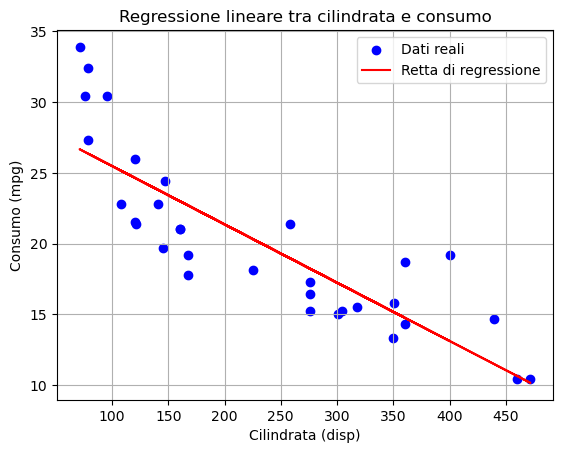

In [6]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df
# Estraiamo le colonne come array NumPy
x = df["disp"].values  # cilindrata
y = df["mpg"].values   # consumo

#Usiamo np.polyfit per il fitting lineare (grado 1):
coeff = np.polyfit(x, y, deg=1)  # retta: y = m*x + q
m, q = coeff
print(f"Coefficiente angolare (m): {m}")
print(f"Intercetta (q): {q}")

# Calcolare le y_predette (modello lineare)
y_pred = m * x + q

# Calcolare MAE e RMSE

# MAE (errore assoluto medio)
mae = np.mean(np.abs(y - y_pred))

# RMSE (errore quadratico medio)
rmse = math.sqrt(np.mean((y - y_pred)**2))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
 
#Visualizzare i dati e la retta di regressione

plt.scatter(x, y, color='blue', label='Dati reali')
plt.plot(x, y_pred, color='red', label='Retta di regressione')
plt.xlabel("Cilindrata (disp)")
plt.ylabel("Consumo (mpg)")
plt.title("Regressione lineare tra cilindrata e consumo")
plt.legend()
plt.grid(True)
plt.show()